<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [5]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [7]:
## Write your code here
df.duplicated().value_counts()

False    65437
Name: count, dtype: int64

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [11]:
## Write your code here
df['CodingActivities'].isna().value_counts()

CodingActivities
False    54466
True     10971
Name: count, dtype: int64

##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [132]:
## Write your code here
df['CodingActivities'].ffill(inplace=True)

ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
150000.0    207
120000.0    203
200000.0    196
42962.0     190
48333.0     178
100000.0    176
59073.0     164
69814.0     162
32222.0     162
130000.0    153
180000.0    149
96666.0     148
80555.0     142
140000.0    137
160000.0    133
Name: count, dtype: int64

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [86]:
## Write your code here
df.select_dtypes(include=['number']).columns

Index(['ResponseId', 'CompTotal', 'WorkExp', 'JobSatPoints_1',
       'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat'],
      dtype='object')

##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [120]:
## Write your code here
ConvertedCompYearly_MinMax = ((df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())).value_counts().head(20)

ConvertedCompYearly_MinMax

ConvertedCompYearly
0.003964    321
0.003303    308
0.004625    230
0.005285    226
0.006607    208
0.009227    207
0.007382    203
0.012303    196
0.002643    190
0.002973    178
0.006151    176
0.003634    164
0.004294    162
0.001982    162
0.007997    153
0.011072    149
0.005946    148
0.004955    142
0.008612    137
0.009842    133
Name: count, dtype: int64

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [123]:
## Write your code here
ConvertedCompYearly_Zscore = ((df['ConvertedCompYearly'] - df['ConvertedCompYearly'].mean()) / df['ConvertedCompYearly'].std()).value_counts().head(20)
ConvertedCompYearly_Zscore

ConvertedCompYearly
-0.116254    321
-0.173767    308
-0.058746    230
-0.001233    226
 0.113788    208
 0.341860    207
 0.181223    203
 0.609587    196
-0.231281    190
-0.202521    178
 0.074132    176
-0.145014    164
-0.087500    162
-0.288789    162
 0.234769    153
 0.502496    149
 0.056280    148
-0.029987    142
 0.288314    137
 0.395405    133
Name: count, dtype: int64

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


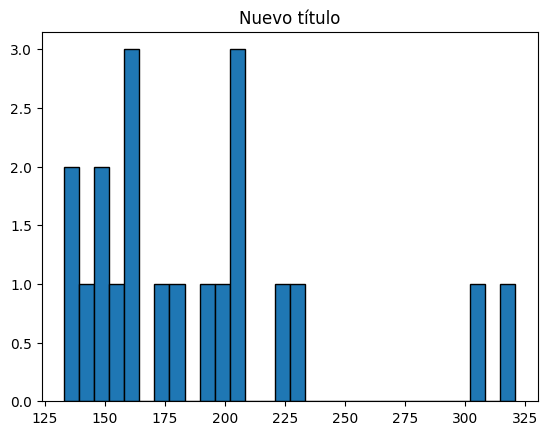

In [145]:
## Write your code here
%matplotlib inline
# Deberia haber usado %matplotlib notebook
plt.hist(x= (df['ConvertedCompYearly_MinMax'].value_counts().head(20)), bins=30, edgecolor='black')
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
